<a href="https://colab.research.google.com/github/visith1577/Machine-learning-first-projects/blob/main/twitter_env_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/nlp-beginner/train.csv')
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
df_test =pd.read_csv('/content/drive/MyDrive/nlp-beginner/test.csv')
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
df_train.info

<bound method DataFrame.info of          id keyword  ...                                               text target
0         1     NaN  ...  Our Deeds are the Reason of this #earthquake M...      1
1         4     NaN  ...             Forest fire near La Ronge Sask. Canada      1
2         5     NaN  ...  All residents asked to 'shelter in place' are ...      1
3         6     NaN  ...  13,000 people receive #wildfires evacuation or...      1
4         7     NaN  ...  Just got sent this photo from Ruby #Alaska as ...      1
...     ...     ...  ...                                                ...    ...
7608  10869     NaN  ...  Two giant cranes holding a bridge collapse int...      1
7609  10870     NaN  ...  @aria_ahrary @TheTawniest The out of control w...      1
7610  10871     NaN  ...  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...      1
7611  10872     NaN  ...  Police investigating after an e-bike collided ...      1
7612  10873     NaN  ...  The Latest: More Homes Razed 

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
df_train.shape

(7613, 5)

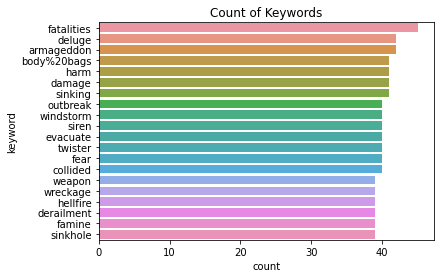

In [ ]:
sns.countplot(y = df_train.keyword,order = df_train['keyword'].value_counts().sort_values(ascending=False).iloc[0:20].index)
plt.title("Count of Keywords")
plt.show() # It shows the most usage keywords 

In [ ]:
for i in ['keyword', 'location']:
  df_train[i] = df_train[i].fillna('None')
  df_test[i] = df_test[i].fillna('None')

In [ ]:
len(set(df_train['location']))

3342

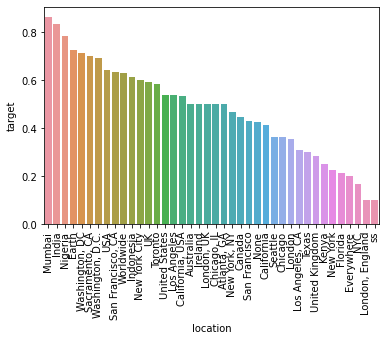

In [ ]:
raw_loc = df_train.location.value_counts()
top_loc_disaster = list(raw_loc[raw_loc>=10].index)
top_only_disaster = df_train[df_train.location.isin(top_loc_disaster)]

top_location = top_only_disaster.groupby('location')['target'].mean().sort_values(ascending=False)
sns.barplot(x=top_location.index, y=top_location)
plt.xticks(rotation=90)
plt.show()


In [ ]:
def clean_location(x):
  if x == 'None': 
    return 'None'
  elif x == 'Earth' or x == 'Worldwide' or x == 'Everywhere':
    return 'Earth'
  elif x == 'Newyork' or x == 'NYC':
    return 'Newyork'
  elif 'London' in x:
    return 'London'
  elif 'Mumbai' in x:
    return 'Mumbai'
  elif 'Washington' in x and 'D' in x and 'C' in x:
    return 'Washington DC'
  elif 'San Francisco' in x:
    return 'San Francisco'
  elif 'Los Angeles' in x:
    return 'Los Angeles'
  elif 'Seattle' in x:
    return 'Seattle'
  elif 'Chicago' in x:
    return 'Chicago'
  elif 'Toronto' in x:
    return 'Toronto'
  elif 'Sacramento' in x:
    return 'Sacramento'
  elif 'Atlanta' in x:
    return 'Atlanta'
  elif 'California' in x:
    return 'California'
  elif 'Florida' in x:
    return 'Florida'
  elif 'Texas' in x:
    return 'Texas'
  elif 'United States' in x or 'USA' in x:
    return 'USA'
  elif 'United Kingdom' in x or 'UK' in x or 'Britain' in x:
    return 'UK' 
  elif 'Canada' in x:
    return 'Canada'
  elif 'India' in x:
    return 'India'
  elif 'Kenya' in x:
    return 'Kenya'
  elif 'Nigeria' in x:
    return 'Nigeria'
  elif 'Australia' in x:
    return 'Australia'
  elif 'Indonesia' in x:
    return 'Indonesia'
  elif x in top_location:
    return x
  else: 
    return 'Others'
    
df_train['location'] = df_train['location'].apply(lambda x: clean_location(str(x)))
df_test['location'] = df_test['location'].apply(lambda x: clean_location(str(x)))         

In [ ]:
class TextCleaningUtils:
    '''
        This class contains implementations of various text cleaning operations (Static Methods)
    '''

    cleaning_regex_map = {
        'web_links': r'(?i)(?:(?:http(?:s)?:)|(?:www\.))\S+',
        'special_chars': r'[^a-zA-Z\s\.,!?;:]+',  
        'redundant_spaces': r'\s\s+',
        'redundant_newlines': r'[\r|\n|\r\n]+',
        'twitter_handles': r'[#@]\S+',
        'punctuations': r'[\.,!?;:]+'
    }

          
    def expand_abbreviations(text):
        text = re.sub(r"he's", "he is", text)
        text = re.sub(r"there's", "there is", text)
        text = re.sub(r"We're", "We are", text)
        text = re.sub(r"That's", "That is", text)
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"they're", "they are", text)
        text = re.sub(r"Can't", "Cannot", text)
        text = re.sub(r"wasn't", "was not", text)
        text = re.sub(r"don\x89Ûªt", "do not", text)
        text= re.sub(r"aren't", "are not", text)
        text = re.sub(r"isn't", "is not", text)
        text = re.sub(r"What's", "What is", text)
        text = re.sub(r"haven't", "have not", text)
        text = re.sub(r"hasn't", "has not", text)
        text = re.sub(r"There's", "There is", text)
        text = re.sub(r"He's", "He is", text)
        text = re.sub(r"It's", "It is", text)
        text = re.sub(r"You're", "You are", text)
        text = re.sub(r"I'M", "I am", text)
        text = re.sub(r"shouldn't", "should not", text)
        text = re.sub(r"wouldn't", "would not", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"i'm", "I am", text)
        text = re.sub(r"I'm", "I am", text)
        text = re.sub(r"Isn't", "is not", text)
        text = re.sub(r"Here's", "Here is", text)
        text = re.sub(r"you've", "you have", text)
        text = re.sub(r"you\x89Ûªve", "you have", text)
        text = re.sub(r"we're", "we are", text)
        text = re.sub(r"what's", "what is", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"we've", "we have", text)
        text = re.sub(r"it\x89Ûªs", "it is", text)
        text = re.sub(r"doesn\x89Ûªt", "does not", text)
        text = re.sub(r"It\x89Ûªs", "It is", text)
        text = re.sub(r"Here\x89Ûªs", "Here is", text)
        text = re.sub(r"who's", "who is", text)
        text = re.sub(r"I\x89Ûªve", "I have", text)
        text = re.sub(r"y'all", "you all", text)
        text = re.sub(r"can\x89Ûªt", "cannot", text)
        text = re.sub(r"would've", "would have", text)
        text = re.sub(r"it'll", "it will", text)
        text = re.sub(r"we'll", "we will", text)
        text = re.sub(r"wouldn\x89Ûªt", "would not", text)
        text = re.sub(r"We've", "We have", text)
        text = re.sub(r"he'll", "he will", text)
        text = re.sub(r"Y'all", "You all", text)
        text = re.sub(r"Weren't", "Were not", text)
        text = re.sub(r"Didn't", "Did not", text)
        text = re.sub(r"they'll", "they will", text)
        text = re.sub(r"DON'T", "DO NOT", text)
        text = re.sub(r"That\x89Ûªs", "That is", text)
        text = re.sub(r"they've", "they have", text)
        text = re.sub(r"they'd", "they would", text)
        text = re.sub(r"i'd", "I would", text)
        text = re.sub(r"should've", "should have", text)
        text = re.sub(r"You\x89Ûªre", "You are", text)
        text = re.sub(r"where's", "where is", text)
        text = re.sub(r"Don\x89Ûªt", "Do not", text)
        text = re.sub(r"i'll", "I will", text)
        text = re.sub(r"weren't", "were not", text)
        text = re.sub(r"They're", "They are", text)
        text = re.sub(r"Can\x89Ûªt", "Cannot", text)
        text = re.sub(r"you\x89Ûªll", "you will", text)
        text = re.sub(r"I\x89Ûªd", "I would", text)
        text = re.sub(r"let's", "let us", text)
        text = re.sub(r"it's", "it is", text)
        text = re.sub(r"can't", "cannot", text)
        text = re.sub(r"don't", "do not", text)
        text = re.sub(r"you're", "you are", text)
        text = re.sub(r"i've", "I have", text)
        text = re.sub(r"that's", "that is", text)
        text = re.sub(r"i'll", "I will", text)
        text = re.sub(r"doesn't", "does not",text)
        text = re.sub(r"i'd", "I would", text)
        text = re.sub(r"didn't", "did not", text)
        text = re.sub(r"ain't", "am not", text)
        text = re.sub(r"you'll", "you will", text)
        text = re.sub(r"I've", "I have", text)
        text = re.sub(r"Don't", "do not", text)
        text = re.sub(r"I'll", "I will", text)
        text = re.sub(r"I'd", "I would", text)
        text = re.sub(r"Let's", "Let us", text)
        text = re.sub(r"you'd", "You would", text)
        text = re.sub(r"It's", "It is", text)
        text = re.sub(r"Ain't", "am not", text)
        text = re.sub(r"Haven't", "Have not", text)
        text = re.sub(r"Hadn't", "Had not", text)
        text = re.sub(r"Could've", "Could have", text)
        text = re.sub(r"youve", "you have", text)  
        text = re.sub(r"donå«t", "do not", text)  

        return text

    def remove_emojis(text):
        emoji_clean= re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text=emoji_clean.sub(r'',text)
        url_clean= re.compile(r"https://\S+|www\.\S+")
        text=url_clean.sub(r'',text)
        return text


    @staticmethod
    def clean_text_from_regex(text, text_clean_regex):
        '''
            Follow a particular cleaning expression, provided
            as an input by an user to clean the text.
        '''

        text = text_clean_regex.sub(' ', text).strip()
        return text

    @staticmethod
    def strip_html(text):
        soup = BeautifulSoup(text, "html.parser")
        return soup.get_text()

    @staticmethod
    def remove_special_chars(text):
        '''
            Replace any special character provided as default,
            which is present in the text with space
        '''

        special_chars_regex = re.compile(TextCleaningUtils.cleaning_regex_map['special_chars'])
        text = TextCleaningUtils.clean_text_from_regex(text, special_chars_regex)
        return text


    @staticmethod
    def remove_redundant_spaces(text):
        '''
            Remove any redundant space provided as default,
            that is present in the text.
        '''

        redundant_spaces_regex = re.compile(
            TextCleaningUtils.cleaning_regex_map['redundant_spaces'])
        text = TextCleaningUtils.clean_text_from_regex(text, redundant_spaces_regex)
        return text

    @staticmethod
    def remove_web_links(text):
        '''
            Removes any web link that follows a particular default expression,
            present in the text.
        '''

        web_links_regex = re.compile(TextCleaningUtils.cleaning_regex_map['web_links'])
        text = TextCleaningUtils.clean_text_from_regex(text, web_links_regex)
        return text


    @staticmethod
    def remove_twitter_handles(text):
        '''
            Removes any twitter handle present in the text.
        '''

        twitter_handles_regex = re.compile(TextCleaningUtils.cleaning_regex_map['twitter_handles'])
        text = TextCleaningUtils.clean_text_from_regex(text, twitter_handles_regex)
        return text

    @staticmethod
    def remove_redundant_newlines(text):
        '''
            Removes any redundant new line present in the text.
        '''

        redundant_newlines_regex = re.compile(
            TextCleaningUtils.cleaning_regex_map['redundant_newlines'])
        text = TextCleaningUtils.clean_text_from_regex(text, redundant_newlines_regex)
        return text

    @staticmethod
    def remove_punctuations(text):
          '''
           Removes any puncuations.
          '''

          punctuations_regex = re.compile(
              TextCleaningUtils.cleaning_regex_map['punctuations']
          )
          text = TextCleaningUtils.clean_text_from_regex(text, punctuations_regex)
          return text

    @staticmethod
    def remove_exaggerated_words(text):
        '''
            Removes any exaggerated word present in the text.
        '''

        return ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))

    @staticmethod
    def replace_multiple_chars(text):
        '''
            Replaces multiple characters present in the text.
        '''

        char_list = ['.', '?', '!', '#', '$', '/', '@', '*', '(', ')', '+']
        final_text = ''
        for i in char_list:
            if i in text:
                pattern = "\\" + i + '{2,}'
                repl_str = i.replace("\\", "")
                text = re.sub(pattern, repl_str, text)
                final_text = ' '.join(text.split())
        return final_text

    @staticmethod
    def replace_sign(text):
        '''
          Replaces any sign with words like & with 'and', in the text.
        '''
        sign_list = {'&': ' and ', '/': ' or ', '\xa0': ' '}
        final_text = ''
        for i in sign_list:
            if i in text:
                text = re.sub(i, sign_list[i], text)
                final_text = ' '.join(text.split())
        return final_text

    @staticmethod
    def remove_accented_char(text):
        text = unicodedata.normalize('NFD', text) \
            .encode('ascii', 'ignore') \
            .decode("utf-8")
        return str(text)



    @staticmethod
    def replace_characters(text, replace_map):
        '''
            Replaces any character custom provided by an user.
        '''

        for char, replace_val in replace_map.items():
            text = text.replace(char, replace_val)
        return text
    
def clean_data(df,col_to_clean):
    df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.expand_abbreviations)
    df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_emojis)
    df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_special_chars)
    df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_redundant_spaces)
    df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_punctuations)
    df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_exaggerated_words)
    df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_redundant_newlines)
    df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_twitter_handles)
    df[col_to_clean] = df[col_to_clean].apply(TextCleaningUtils.remove_web_links)
    df[col_to_clean] = df[col_to_clean].astype(str)
    df[col_to_clean] = df[col_to_clean].str.lower()
    
    return df 
     

In [ ]:
import re
import itertools

In [ ]:
cleaned_data = clean_data(df_train, 'text')

In [ ]:
cleaned_test_data = clean_data(df_test, 'text')

In [ ]:
cleaned_data.head(15)

,id,keyword,location,text,target
0,1,None,None,our deeds are the reason of this earthquake ma...,1
1,4,None,None,forest fire near la ronge sask canada,1
2,5,None,None,all residents asked to shelter in place are be...,1
3,6,None,None,people receive wildfires evacuation orders in ...,1
4,7,None,None,just got sent this photo from ruby alaska as s...,1
5,8,None,None,rockyfire update california hwy closed in both...,1
6,10,None,None,flood disaster heavy rain causes flash floodin...,1
7,13,None,None,i am on top of the hill and i can see a fire i...,1
8,14,None,None,there is an emergency evacuation happening now...,1
9,15,None,None,i am afraid that the tornado is coming to our ...,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


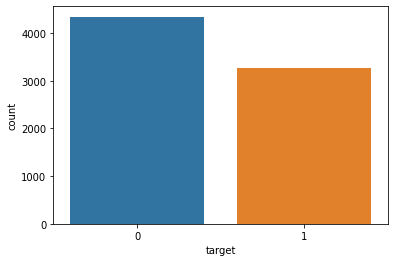

In [ ]:
sns.countplot(cleaned_data['target'])
plt.show();

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
#removing stopwords
from sklearn.feature_extraction import stop_words
import string

stop_words = stop_words.ENGLISH_STOP_WORDS


def remove_stopwords(doc):
    doc = " ".join([token for token in doc.split()if token not in stop_words])
    return doc.lower()

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec_text = TfidfVectorizer(min_df = 10, ngram_range = (1,2), stop_words='english') 
text_vec = vec_text.fit_transform(cleaned_data['text'])
text_vec_test = vec_text.transform(cleaned_test_data['text'])
X_train_text = pd.DataFrame(text_vec.toarray(), columns=vec_text.get_feature_names())
X_test_text = pd.DataFrame(text_vec_test.toarray(), columns=vec_text.get_feature_names())
print (X_train_text.shape)

(7613, 1690)


In [ ]:
from sklearn.model_selection import train_test_split
x = X_train_text
y = cleaned_data['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
x_train.shape

(6090, 1690)

In [ ]:
y_train.shape

(6090,)

In [ ]:
nb = MultinomialNB()
model = nb.fit(x_train, y_train)

In [ ]:
prediction  = model.predict(x_test)

In [ ]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(model, x_test, y_test, cv=10).mean()

In [ ]:
print(accuracy)

0.7596706226350188


In [ ]:
from sklearn.metrics import f1_score
f1_score = f1_score(y_test, prediction)

In [ ]:
f1_score

0.7283842794759825

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predict_reg  = reg.predict(x_test)

In [ ]:
predict_reg

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
prediction

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:

accuracy_reg = cross_val_score(reg, x_test, y_test, cv=10).mean()
accuracy_reg

0.7498108015135879

In [ ]:
#prediction using naive bayes
predict_submission = model.predict(X_test_text)

In [ ]:
submission = pd.DataFrame({'id':df_test['id'],'target': predict_submission })

In [ ]:
submission.to_csv('submissions-nlpforbeginners-naiveBayes.csv', index=False)

In [ ]:
submission_2 = pd.DataFrame({'id': df_test['id'], 'target': predict_submission_2 })

In [ ]:
predict_submission_2 = reg.predict(X_test_text)

In [ ]:
submission_2.to_csv('submission-nlpbeginners-logreg.csv', index=False)